# EV Sales Market

## Library Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Reading the dataset file

In [3]:
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [4]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


## Added an age group column

In [5]:
df['Age_Group'] = pd.cut(df['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51-55'])

In [6]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Age_Group
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,25-30
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,31-35
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,41-45
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,41-45
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,31-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,25-30
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,46-50
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,51-55
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,51-55


## Age Statistics of car make

In [7]:
age_make_stats = df.groupby('Make')['Age'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print(age_make_stats.sort_values('mean'))

      Make       mean  median  min  max  count
0   Baleno  33.421053    33.0   27   46     19
8      i20  33.500000    34.5   26   42     12
7    Verna  34.000000    35.0   29   37      4
2     City  34.000000    34.5   28   41     10
6      SUV  37.421053    36.0   27   50     19
1     Ciaz  37.916667    35.5   27   51     12
3   Creata  38.714286    39.0   30   51     14
4   Duster  40.571429    41.0   34   49      7
5  Luxuray  45.000000    45.0   41   49      2


## Inferential Statistics of the Age column in regards to other columns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32256\167071184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Age', data=df, palette='viridis')


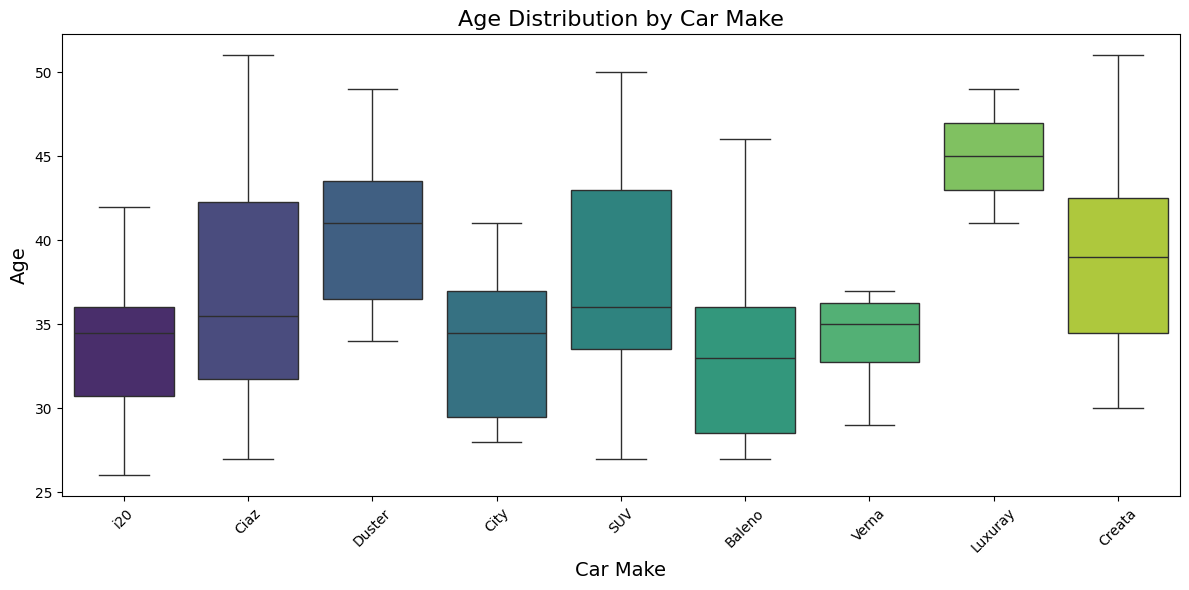

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Age', data=df, palette='viridis')
plt.title('Age Distribution by Car Make', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

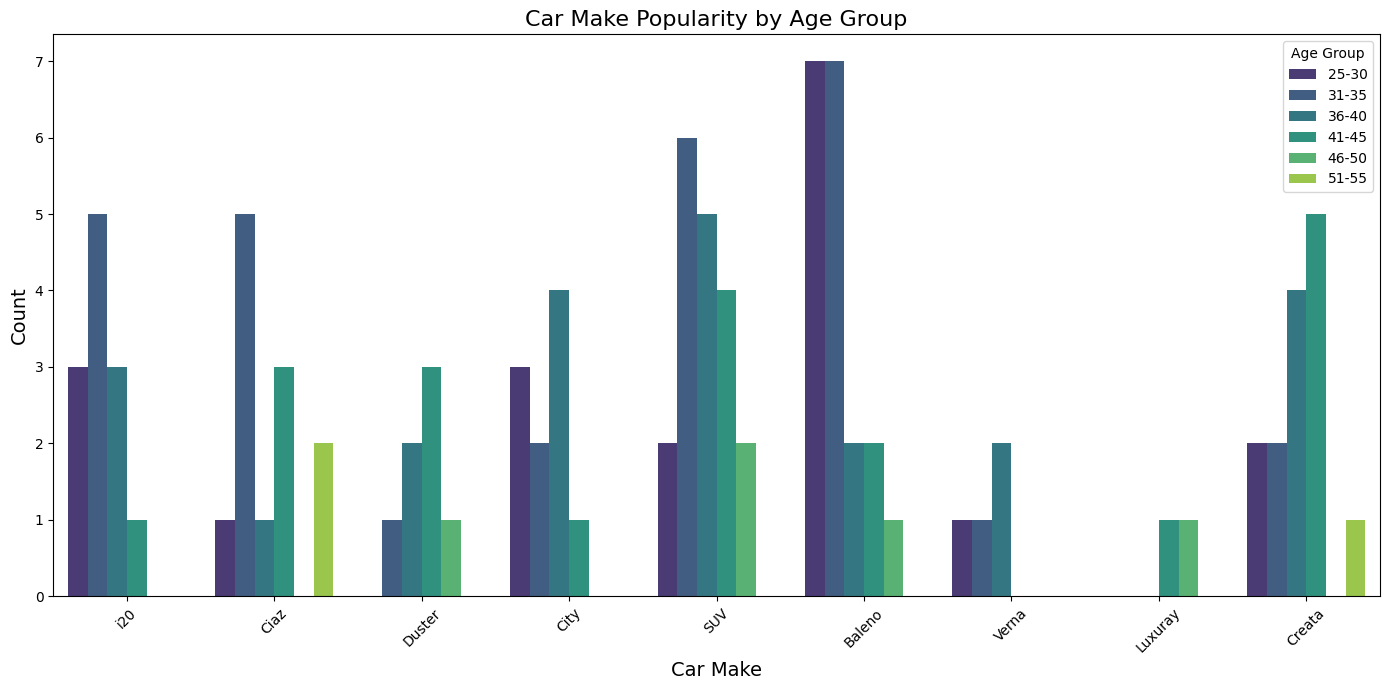

In [9]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Make', hue='Age_Group', data=df, palette='viridis')
plt.title('Car Make Popularity by Age Group', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

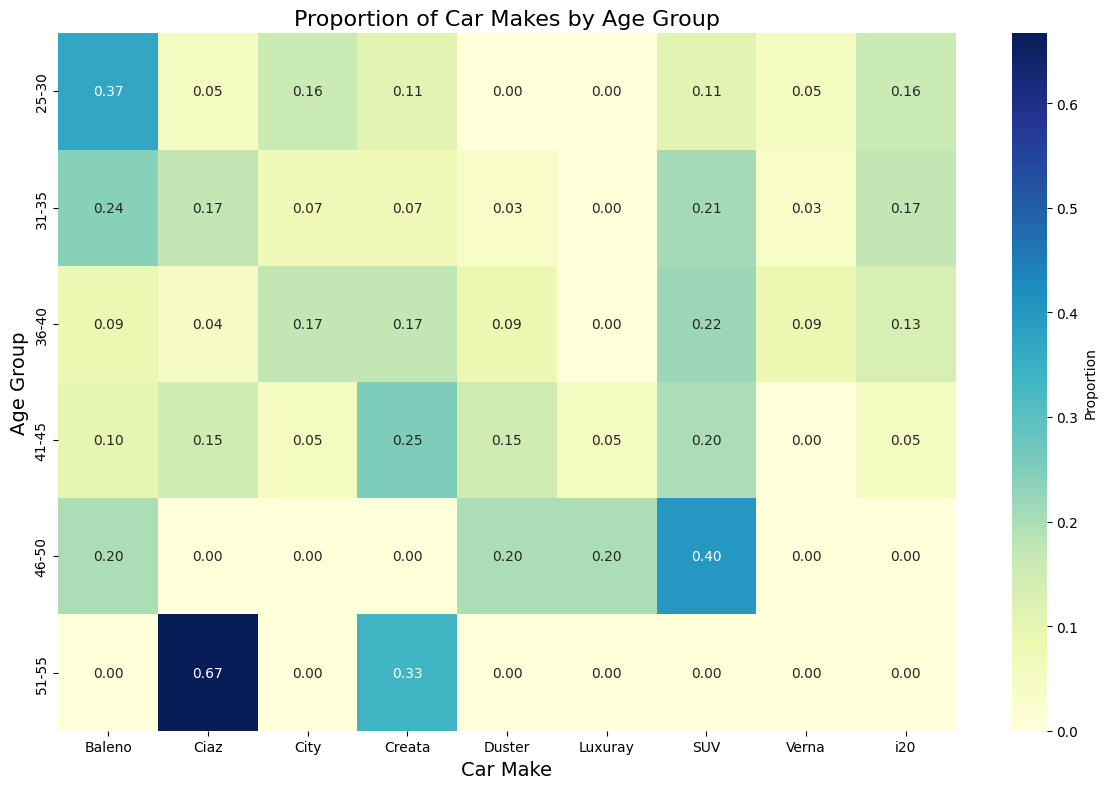

In [10]:
plt.figure(figsize=(12, 8))
age_make_crosstab = pd.crosstab(df['Age_Group'], df['Make'], normalize='index')
sns.heatmap(age_make_crosstab, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Car Makes by Age Group', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Individual Salary')

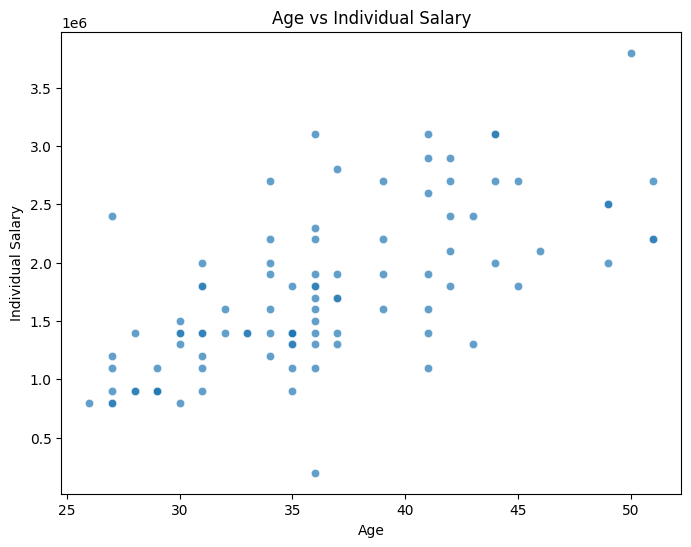

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.7)
plt.title('Age vs Individual Salary')
plt.xlabel('Age')
plt.ylabel('Individual Salary')

Text(0, 0.5, 'Total Salary')

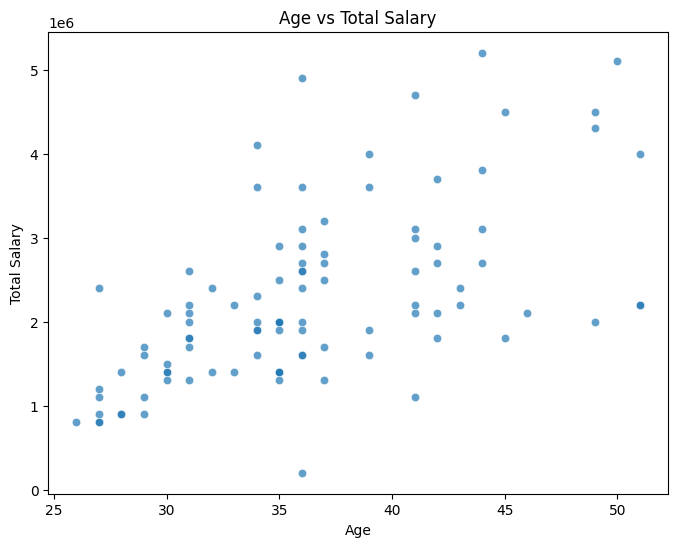

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Total Salary', data=df, alpha=0.7)
plt.title('Age vs Total Salary')
plt.xlabel('Age')
plt.ylabel('Total Salary')

In [13]:
age_salary = df.groupby('Age_Group')[['Salary', 'Total Salary']].mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32256\2584691571.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_salary = df.groupby('Age_Group')[['Salary', 'Total Salary']].mean().reset_index()


Text(0, 0.5, 'Average Salary')

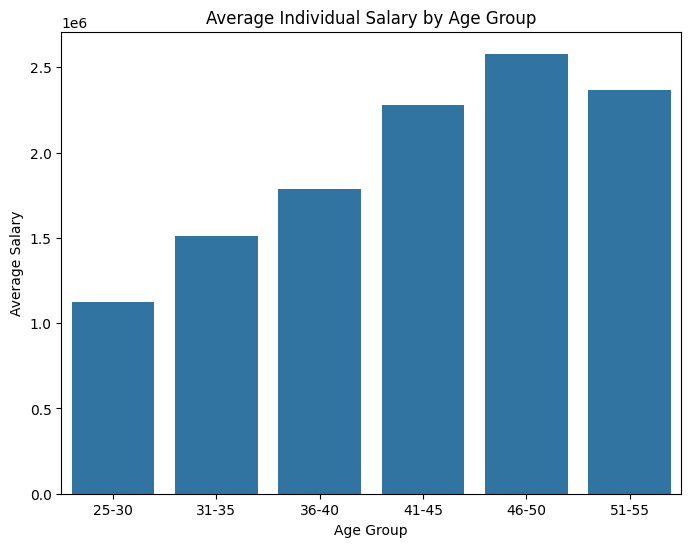

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Salary', data=age_salary)
plt.title('Average Individual Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')

Text(0, 0.5, 'Average Total Salary')

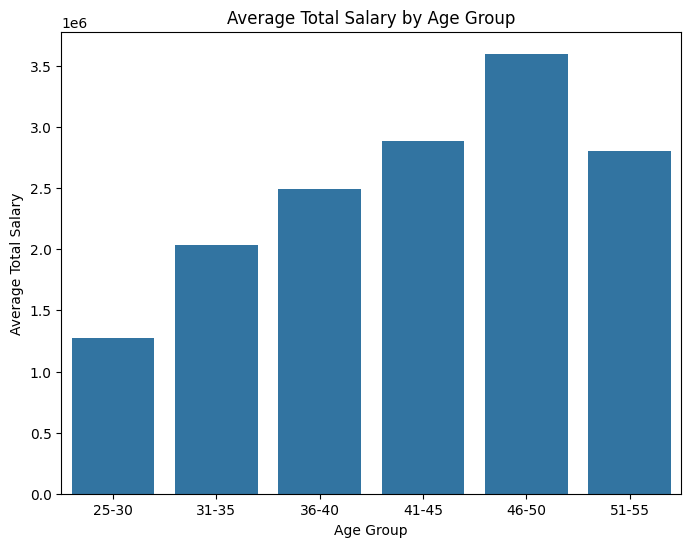

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Total Salary', data=age_salary)
plt.title('Average Total Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Salary')

Text(0, 0.5, 'Age')

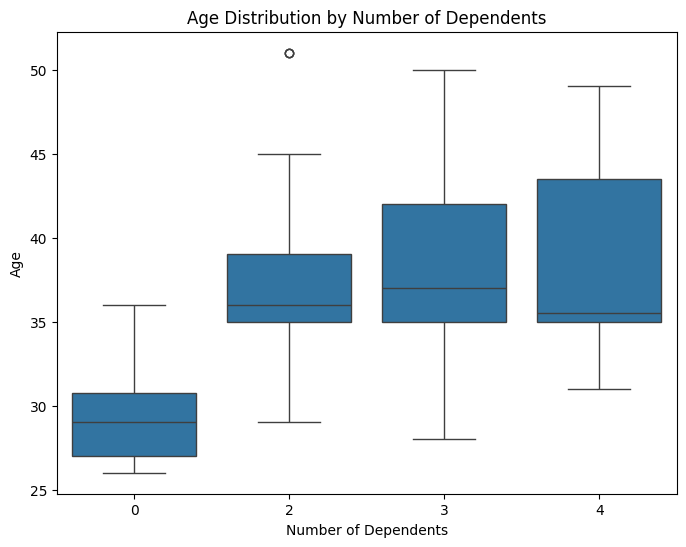

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='No of Dependents', y='Age', data=df)
plt.title('Age Distribution by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Age')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32256\2256067063.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dependent_age = df.groupby('Age_Group')['No of Dependents'].mean().reset_index()


Text(0, 0.5, 'Average Dependents')

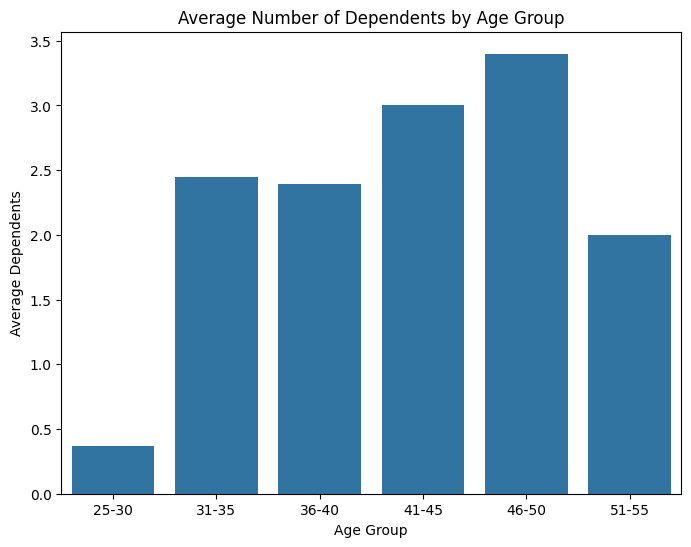

In [17]:
plt.figure(figsize=(8, 6))
dependent_age = df.groupby('Age_Group')['No of Dependents'].mean().reset_index()
sns.barplot(x='Age_Group', y='No of Dependents', data=dependent_age)
plt.title('Average Number of Dependents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Dependents')

In [18]:
df['Personal_Loan_Numeric'] = df['Personal loan'].map({'Yes': 1, 'No': 0})
df['House_Loan_Numeric'] = df['House Loan'].map({'Yes': 1, 'No': 0})

In [19]:
loan_by_age = df.groupby('Age_Group')[['Personal_Loan_Numeric', 'House_Loan_Numeric']].mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32256\2865489084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_by_age = df.groupby('Age_Group')[['Personal_Loan_Numeric', 'House_Loan_Numeric']].mean().reset_index()


(0.0, 1.0)

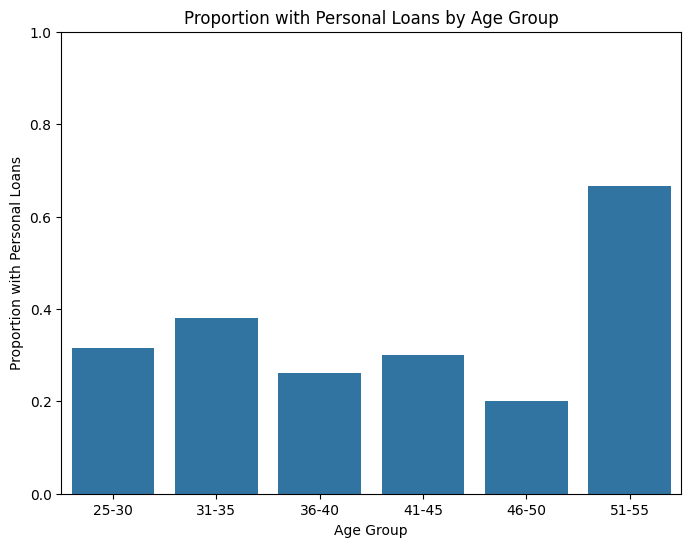

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Personal_Loan_Numeric', data=loan_by_age)
plt.title('Proportion with Personal Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Personal Loans')
plt.ylim(0, 1)

(0.0, 1.0)

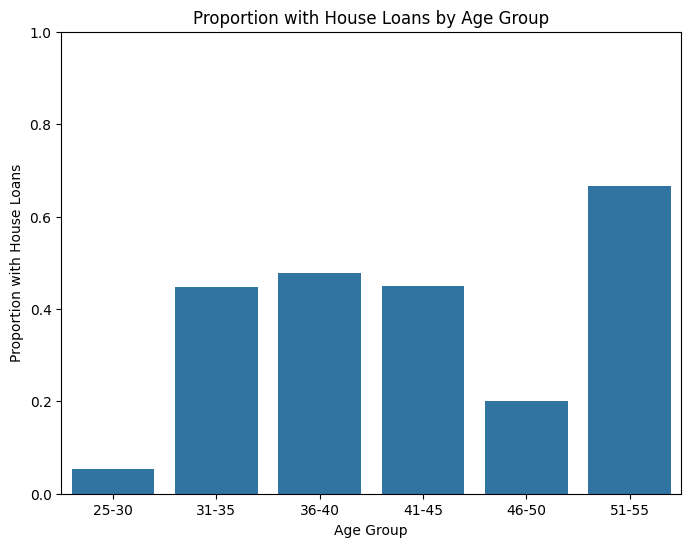

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='House_Loan_Numeric', data=loan_by_age)
plt.title('Proportion with House Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with House Loans')
plt.ylim(0, 1)

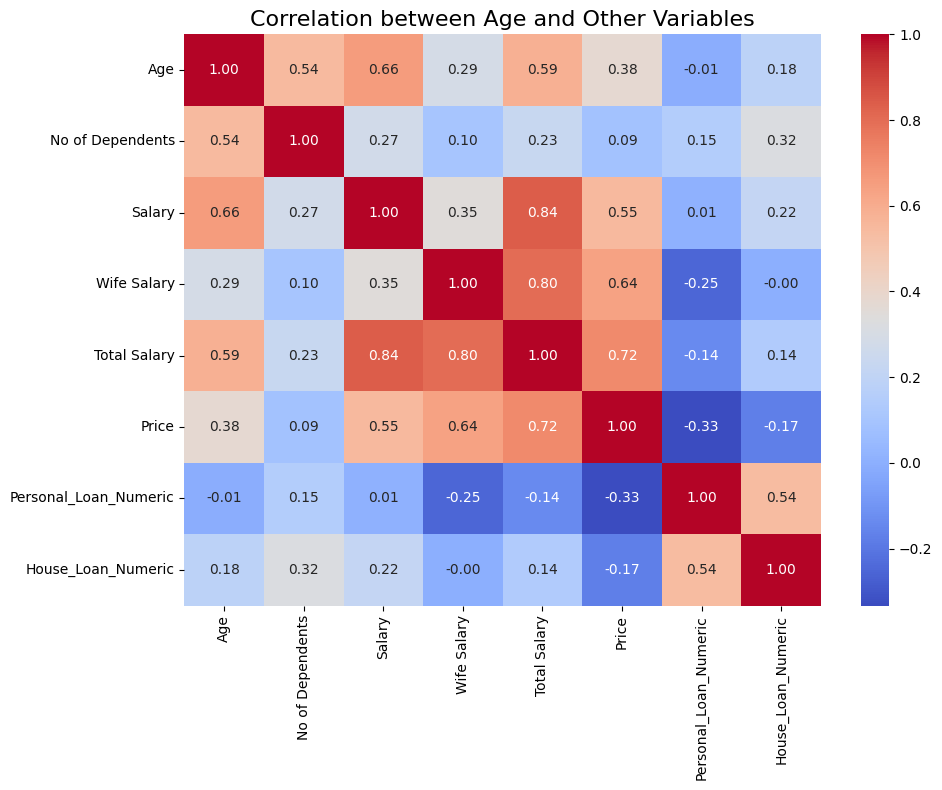

In [22]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 
                'Total Salary', 'Price', 'Personal_Loan_Numeric', 'House_Loan_Numeric']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Age and Other Variables', fontsize=16)
plt.tight_layout()

## Age relation to life choices

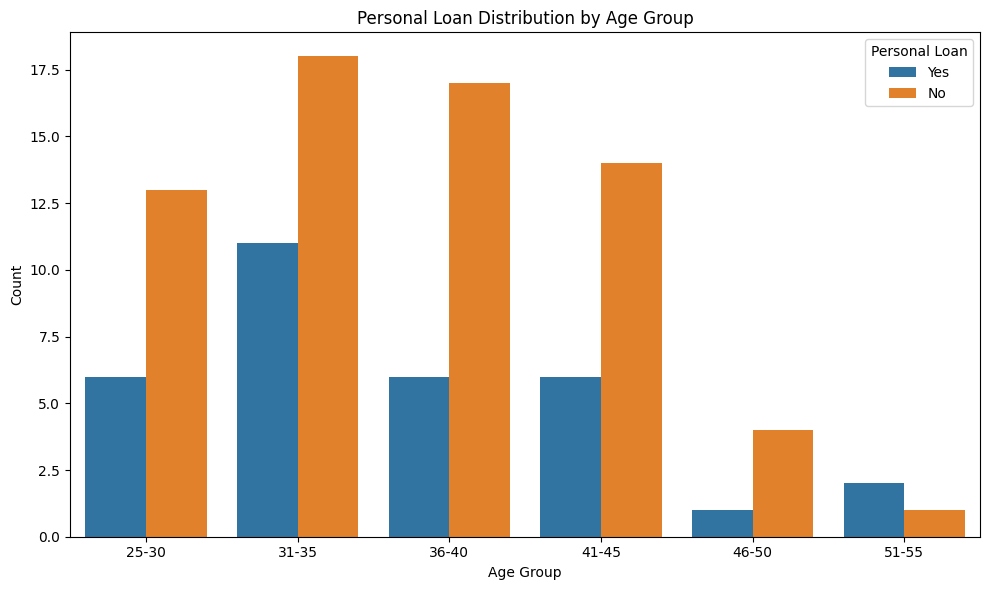

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Personal loan', data=df)
plt.title('Personal Loan Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Personal Loan')
plt.tight_layout()
plt.show()

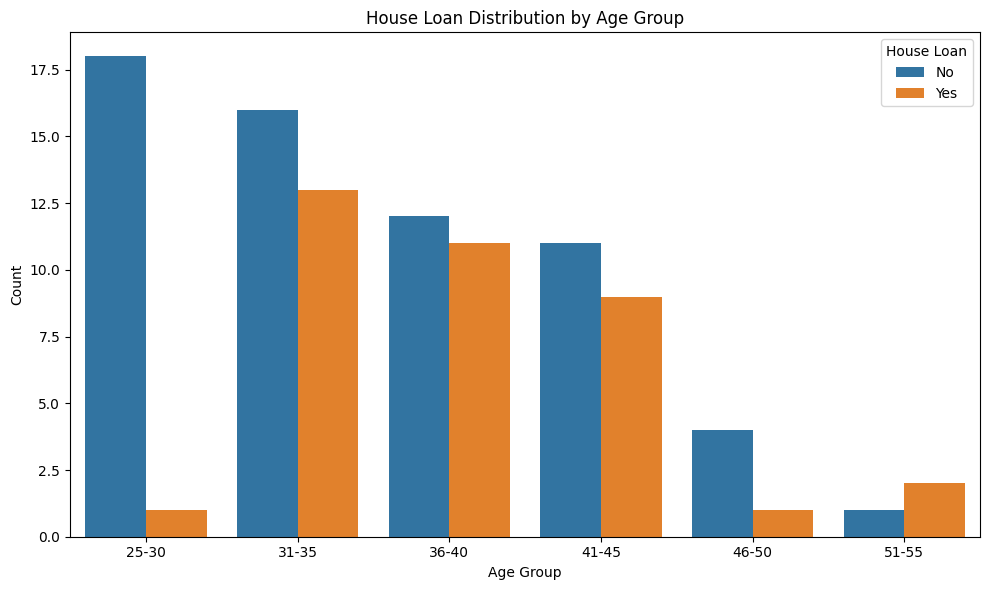

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='House Loan', data=df)
plt.title('House Loan Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='House Loan')
plt.tight_layout()
plt.show()

In [25]:
df.Age.describe()

count    99.000000
mean     36.313131
std       6.246054
min      26.000000
25%      31.000000
50%      36.000000
75%      41.000000
max      51.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Count')

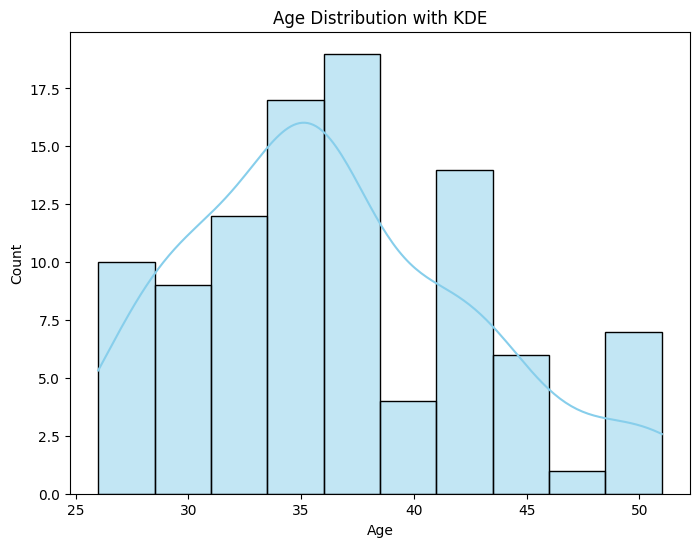

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Count')

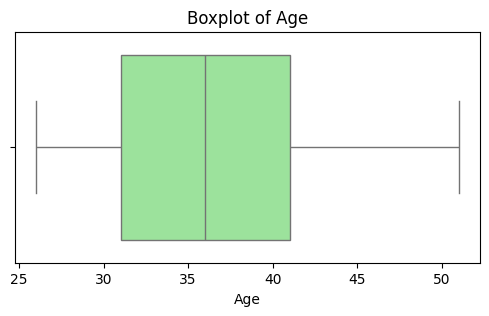

In [27]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [28]:
df['Age_Group'].value_counts().sort_index()

Age_Group
25-30    19
31-35    29
36-40    23
41-45    20
46-50     5
51-55     3
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32256\3488998985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age_Group', y='Total Salary', data=df, palette='Pastel1')


Text(0, 0.5, 'Total Salary')

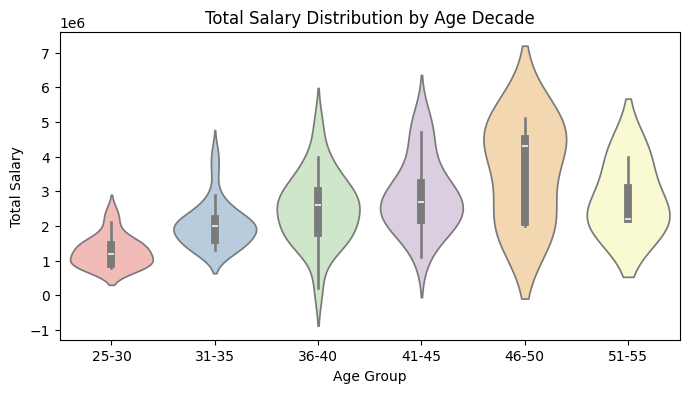

In [29]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='Age_Group', y='Total Salary', data=df, palette='Pastel1')
plt.title('Total Salary Distribution by Age Decade')
plt.xlabel('Age Group')
plt.ylabel('Total Salary')

In [30]:
numeric_cols = ['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
corr_matrix = df[numeric_cols].corr()

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

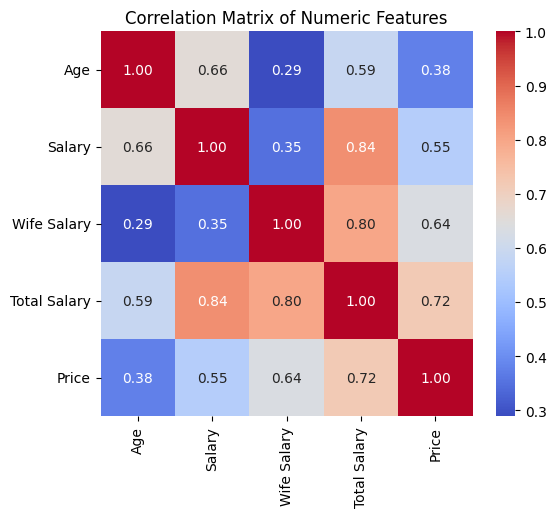

In [31]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')

In [32]:
corr_matrix['Age'].drop('Age').sort_values(ascending=False)

Salary          0.656442
Total Salary    0.587082
Price           0.376661
Wife Salary     0.288546
Name: Age, dtype: float64

Text(0, 0.5, 'Price')

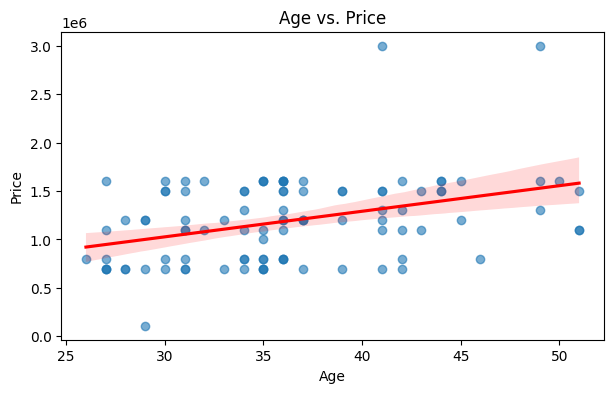

In [33]:
plt.figure(figsize=(7, 4))
sns.regplot(x='Age', y='Price', data=df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')

Text(0, 0.5, 'Total Salary')

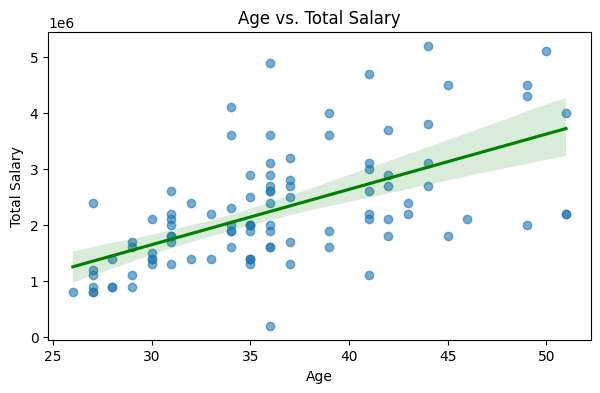

In [34]:
plt.figure(figsize=(7, 4))
sns.regplot(x='Age', y='Total Salary', data=df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
plt.title('Age vs. Total Salary')
plt.xlabel('Age')
plt.ylabel('Total Salary')

In [35]:
pearson_price = pearsonr(df['Age'], df['Price'])
pearson_salary = pearsonr(df['Age'], df['Total Salary'])
spearman_price = spearmanr(df['Age'], df['Price'])
spearman_salary = spearmanr(df['Age'], df['Total Salary'])

print(f"Pearson Age-Price: r={pearson_price[0]:.2f}, p={pearson_price[1]:.3f}")
print(f"Pearson Age-TotalSalary: r={pearson_salary[0]:.2f}, p={pearson_salary[1]:.3f}")
print(f"Spearman Age-Price: ρ={spearman_price.correlation:.2f}, p={spearman_price.pvalue:.3f}")
print(f"Spearman Age-TotalSalary: ρ={spearman_salary.correlation:.2f}, p={spearman_salary.pvalue:.3f}")

Pearson Age-Price: r=0.38, p=0.000
Pearson Age-TotalSalary: r=0.59, p=0.000
Spearman Age-Price: ρ=0.36, p=0.000
Spearman Age-TotalSalary: ρ=0.62, p=0.000


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Total Salary', 'Price']])

Text(0.5, 1.0, 'Elbow Method for Optimal k')

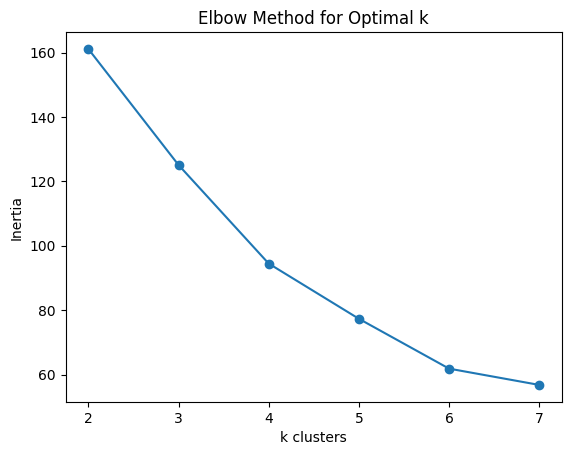

In [37]:
inertia = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, 'o-')
plt.xlabel('k clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [38]:
k_opt = 8
kmeans = KMeans(n_clusters=k_opt, random_state=42).fit(X_scaled)
labels = kmeans.labels_

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score (k={k_opt}): {sil_score:.3f}")

df['Cluster'] = labels

Silhouette Score (k=8): 0.351


Text(0.5, 1.0, 'K-Means Clusters on PCA projection')

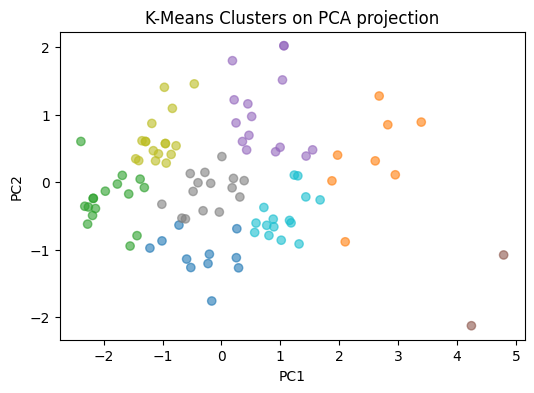

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pcs = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(pcs[:,0], pcs[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('K-Means Clusters on PCA projection')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['Age', 'Total Salary']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 311738.7659769578
R²: 0.21758640501383653
